In [1]:
# Installing modules
%pip install numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 3.7 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.8 MB/s  0:00:01 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.2 MB/s  0:00:00 eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [6]:
# Define 1D linear regression model
def f(x, phi0, phi1):
    # TODO: Replace this line with the linear regression model (e.g. 2.4)
    y = phi0 + phi1 * x
    return y

In [7]:
def plot(x, y, phi0, phi1):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    plt.xlim([0, 2.0])
    plt.ylim([0, 2.0])
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    # Draw line
    x_line = np.arange(0, 2.0, 0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line, 'b-', lw=2)

    plt.show()


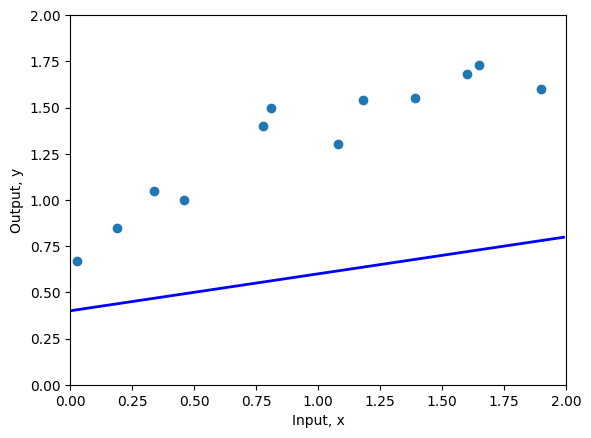

In [8]:
# Set the intercept and slope as in fig. 2.2b
phi0=0.4; phi1=0.2
# Plot the data and the model
plot(x, y, phi0, phi1)

In [9]:
# Function to calculate the loss
def compute_loss(x, y, phi0, phi1):
    # TODO: Replace this line with the loss calcualtion (eq. 2.5)
    y_predictions = f(x, phi0, phi1)
    error = y_predictions - y
    loss = np.sum(error**2)
    return loss


In [10]:
# Compute the loss for our current model
loss = compute_loss(x, y, phi0, phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth = 7.07')

Your Loss = 7.07, Ground truth = 7.07


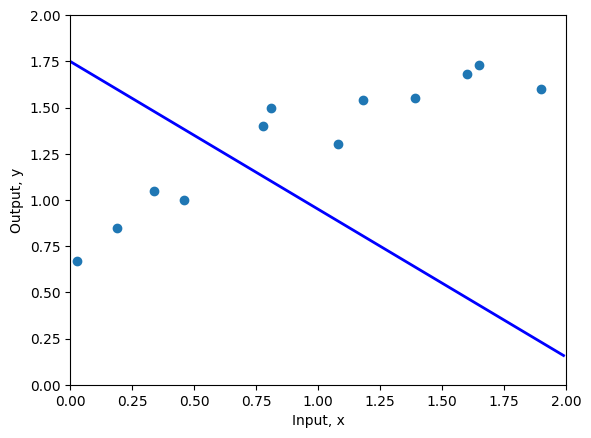

Your Loss = 8.81, Ground truth = 10.28


In [16]:
# Set the intercept and slope as in fig 2.2c
phi0 = 1.75; phi1 = -0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x, y, phi0, phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth = 10.28')

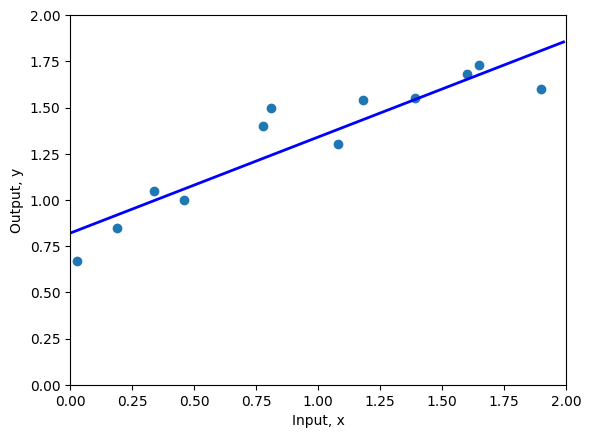

Your Loss =  0.20


In [23]:
# TODO: Change the parameteres manually to fit the model
# First fix phi1 and try changing phi0 until you cant make the loss go down any more
# Then fix phi0 and try changiong phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters hat fit the model as in fig 2.2d
# You can either do this bu handor if you want to get fancy write code to descent automatically in this way
# Start at these values:
phi0=0.82; phi1=0.52

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1): 3.2f}')

In [ ]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

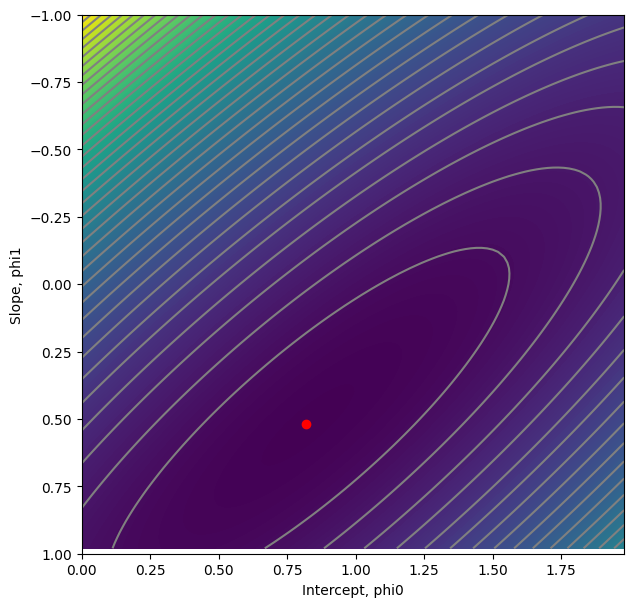

In [28]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7, 7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses, levels, colors=['#808080'])
ax.set_ylim([1, -1])
ax.set_xlabel(r'Intercept, phi0')
ax.set_ylabel(r'Slope, phi1')

# Plot the position of your best fitting line on the loss function
# It shuold be close to the minimum
ax.plot(phi0, phi1, 'ro')
plt.show()